In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

C:\Users\PARTHA\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Data=pd.read_csv("C:/Users/PARTHA/Desktop/Pricipal Component Analysis/Iris.csv")

In [3]:
Data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
Data.shape

(150, 5)

In [5]:
Features=Data.iloc[:,0:4]
Features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
Features.var(axis=0)

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
dtype: float64

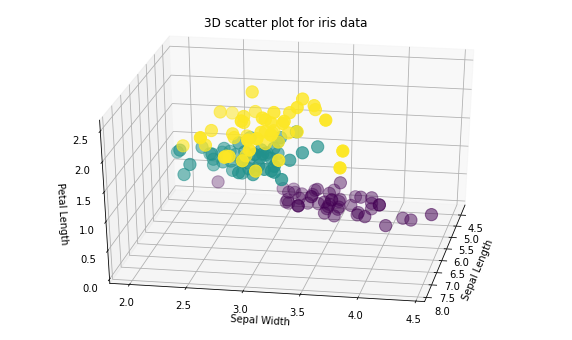

In [7]:
cm = plt.get_cmap("RdYlGn")

x = Data['SepalLengthCm']
y = Data['SepalWidthCm']
z = Data['PetalWidthCm']
col = Data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
shape=len(Data)

# 3D Plot
fig = plt.figure(figsize=(10,6))
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(x, y, z, s=shape, c=col, marker='o')                                                                                
ax3D.set_xlabel('Sepal Length')
ax3D.set_ylabel('Sepal Width')
ax3D.set_zlabel('Petal Length')
ax3D.set_title("3D scatter plot for iris data")
ax3D.view_init(30, 10)
plt.show()

In [8]:
class ApplyPCA:
    
    def __init__(self):
        self.components=None
        
    
    def ApplyStandardization(self,x):
        scaler=StandardScaler()
        scaled_data=scaler.fit_transform(x)
        return scaled_data
    
    def Fit_PCA(self,x,components):
        self.components=components
        PCA_inst=PCA(n_components=components)
        projected_data=PCA_inst.fit_transform(x)
        return projected_data
    
    def VisualizePCA(self,x):
        plt.figure(figsize=(10,6))
        target=Data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
        #colors = {0:'red', 1:'blue',2:'green'}
        #label_color = [colors[l] for l in target]
        sns.scatterplot(x[:,0],x[:,1],hue=target,alpha=0.6)
        plt.xlabel('Component1')
        plt.ylabel('Component2')
        plt.title("Visulalizing principal components")
        plt.show()
        
    def Screeplot(self,x):
        plt.figure(figsize=(10,6))
        PCA_ist=PCA().fit(x)
        plt.plot(np.cumsum(PCA_ist.explained_variance_ratio_))
        plt.xlabel('number of components')
        plt.ylabel('cumulative explained variance')
        plt.title("Scree Plot")
        plt.show()
        


In [9]:
pca=ApplyPCA()

In [10]:
scaled_data=pca.ApplyStandardization(Features)


In [11]:
proj_data=pca.Fit_PCA(scaled_data,2)

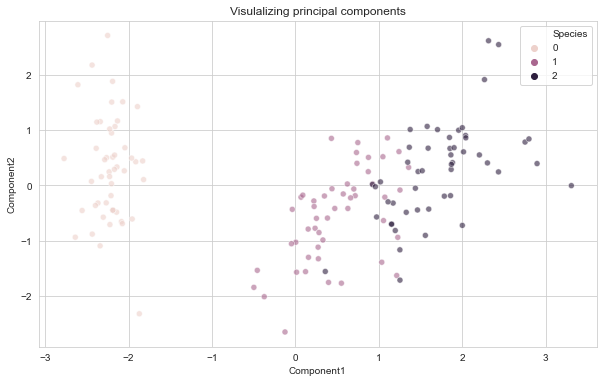

In [12]:
sns.set_style('whitegrid')
pca.VisualizePCA(proj_data)

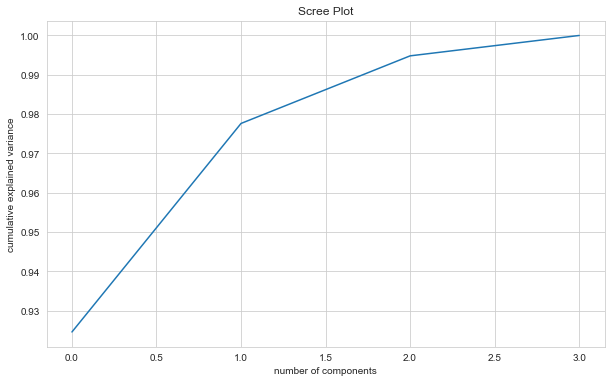

In [13]:
sns.set_style('whitegrid')
pca.Screeplot(Features)